<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_1893/NGC_1893.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [0]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 4.9MB/s 
     |████████████████████████████████| 2.3MB 58.9MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=da6bc812a48611e5b8a4b5253d4fa2e9663aef4ebd02899597b82d0bda931bbb
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [0]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [0]:
## making a GAIA cone_search of 30m radius around NGC1893 center

coordinate = coord.SkyCoord.from_name('NGC1893')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))
# r.pprint()

<SkyCoord (ICRS): (ra, dec) in deg
    (80.68333333, 33.41166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [0]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


solution_id  ...      dist
0      1635721458409799680  ...  0.001133
1      1635721458409799680  ...  0.001870
2      1635721458409799680  ...  0.002554
3      1635721458409799680  ...  0.003314
4      1635721458409799680  ...  0.003396
...                    ...  ...       ...
33221  1635721458409799680  ...  0.499965
33222  1635721458409799680  ...  0.499970
33223  1635721458409799680  ...  0.499975
33224  1635721458409799680  ...  0.499976
33225  1635721458409799680  ...  0.499987

[33226 rows x 97 columns]

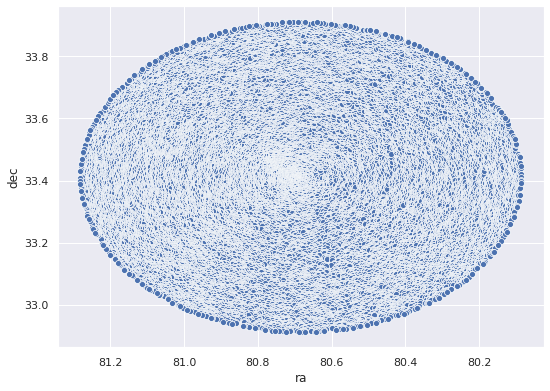

In [0]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(data['ra'], data['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [0]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [0]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 

cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [0]:
## saving only NGC 1893 data from Cantat

cantat_1893 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_1893")
cantat_1893 = cantat_1893[0].to_pandas()
cantat_1893

RA_ICRS    DE_ICRS  ...   _RA.icrs   _DE.icrs
0    81.149455  33.284768  ...  81.149455  33.284771
1    81.119439  33.363766  ...  81.119442  33.363768
2    81.131238  33.508885  ...  81.131237  33.508888
3    81.006873  33.548464  ...  81.006874  33.548471
4    81.122228  33.440556  ...  81.122226  33.440563
..         ...        ...  ...        ...        ...
489  80.738744  33.441257  ...  80.738745  33.441263
490  80.759437  33.527037  ...  80.759438  33.527041
491  80.486479  33.742721  ...  80.486477  33.742726
492  80.688044  33.406547  ...  80.688047  33.406553
493  80.699356  33.444297  ...  80.699357  33.444303

[494 rows x 13 columns]

In [0]:
cantat_1893 = cantat_1893.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
cantat_1893 = cantat_1893.loc[:,['source_id', 'PMemb']]


In [0]:
cantat_1893 = all_stars.join(cantat_1893.set_index('source_id'), on='source_id')

In [0]:
cantat_1893 = cantat_1893.dropna(subset=['PMemb'])
cantat_1893

solution_id                     designation  ...      dist  PMemb
0      1635721458409799680  b'Gaia DR2 181173647673361280'  ...  0.001133    0.6
18     1635721458409799680  b'Gaia DR2 181173643374509824'  ...  0.006447    0.6
23     1635721458409799680  b'Gaia DR2 181174403587604224'  ...  0.007357    1.0
33     1635721458409799680  b'Gaia DR2 181174025630479360'  ...  0.008474    1.0
35     1635721458409799680  b'Gaia DR2 181174025630481024'  ...  0.008792    0.6
...                    ...                             ...  ...       ...    ...
22220  1635721458409799680  b'Gaia DR2 182470723501404800'  ...  0.409520    0.1
22362  1635721458409799680  b'Gaia DR2 180963640952737152'  ...  0.410939    0.2
22384  1635721458409799680  b'Gaia DR2 182699529295200768'  ...  0.411148    0.1
22389  1635721458409799680  b'Gaia DR2 181162996154586624'  ...  0.411169    0.4
22557  1635721458409799680  b'Gaia DR2 182496944278465920'  ...  0.412680    0.4

[494 rows x 98 columns]

In [0]:
cantat_1893.to_csv('NGC_1893_cantat.csv')
all_stars.to_csv('NGC_1893_Gaia_30m.csv')

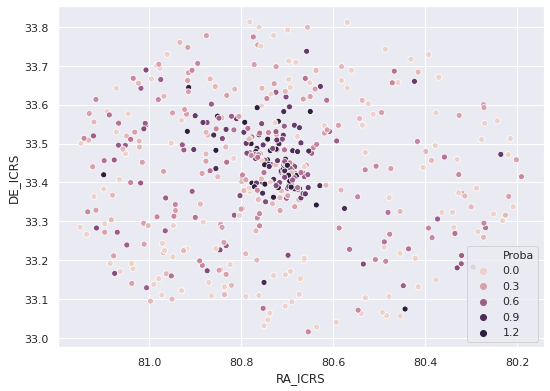

In [0]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_1893['RA_ICRS'], cantat_1893['DE_ICRS'], hue = cantat_1893['Proba'])
skyplot.invert_xaxis()

### Import and Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/ngc_2264_cantat_cleaner.csv')
member.head(5)

dist          solution_id  ...   Cluster    Separation
0  0.004757  1635721458409799680  ...  NGC_2264  1.707530e-08
1  0.006457  1635721458409799680  ...  NGC_2264  1.495125e-08
2  0.009157  1635721458409799680  ...  NGC_2264  1.039909e-08
3  0.009809  1635721458409799680  ...  NGC_2264  1.623900e-08
4  0.009988  1635721458409799680  ...  NGC_2264  1.828416e-08

[5 rows x 116 columns]

In [0]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

dist   solution_id  ...       PMemb    Separation
count  153.000000  1.530000e+02  ...  153.000000  1.530000e+02
mean     0.082276  1.635721e+18  ...    0.884314  1.475398e-08
std      0.044979  0.000000e+00  ...    0.199710  4.966399e-09
min      0.004757  1.635721e+18  ...    0.100000  1.086479e-09
25%      0.041253  1.635721e+18  ...    0.900000  1.190519e-08
50%      0.078604  1.635721e+18  ...    1.000000  1.544945e-08
75%      0.114987  1.635721e+18  ...    1.000000  1.826017e-08
max      0.187742  1.635721e+18  ...    1.000000  2.397258e-08

[8 rows x 110 columns]

In [0]:
# correlation of PMemb with other variables
member.corr().PMemb.sort_values()

rv_template_teff               -0.381246
astrometric_excess_noise_sig   -0.372641
astrometric_gof_al             -0.335258
astrometric_chi2_al            -0.333086
astrometric_excess_noise       -0.331580
                                  ...   
astrometric_params_solved            NaN
frame_rotator_object_type            NaN
rv_template_fe_h                     NaN
flame_flags                          NaN
epoch_photometry_url                 NaN
Name: PMemb, Length: 112, dtype: float64

In [0]:
member = member.drop(columns = ['ref_epoch', 'astrometric_params_solved', 'frame_rotator_object_type'])

In [0]:
# Profile report of the full dataset
pd_prof.ProfileReport(member)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
# Dropping the NULL values
member = member.dropna()
member.describe()

dist  solution_id  source_id  ...  BP-RP  PMemb  Separation
count   0.0          0.0        0.0  ...    0.0    0.0         0.0
mean    NaN          NaN        NaN  ...    NaN    NaN         NaN
std     NaN          NaN        NaN  ...    NaN    NaN         NaN
min     NaN          NaN        NaN  ...    NaN    NaN         NaN
25%     NaN          NaN        NaN  ...    NaN    NaN         NaN
50%     NaN          NaN        NaN  ...    NaN    NaN         NaN
75%     NaN          NaN        NaN  ...    NaN    NaN         NaN
max     NaN          NaN        NaN  ...    NaN    NaN         NaN

[8 rows x 110 columns]

In [0]:
member = member.rename(columns=({'pmra_1':'pmra'}))
member.describe()

dist   solution_id  ...       PMemb    Separation
count  153.000000  1.530000e+02  ...  153.000000  1.530000e+02
mean     0.082276  1.635721e+18  ...    0.884314  1.475398e-08
std      0.044979  0.000000e+00  ...    0.199710  4.966399e-09
min      0.004757  1.635721e+18  ...    0.100000  1.086479e-09
25%      0.041253  1.635721e+18  ...    0.900000  1.190519e-08
50%      0.078604  1.635721e+18  ...    1.000000  1.544945e-08
75%      0.114987  1.635721e+18  ...    1.000000  1.826017e-08
max      0.187742  1.635721e+18  ...    1.000000  2.397258e-08

[8 rows x 110 columns]

In [0]:
features2 = member.iloc[:, 5:]
features2 = features2.drop(columns=['Cluster', 'phot_variable_flag', 'duplicated_source', 'astrometric_primary_flag', 'PMemb'])
features2

ra  ra_error       dec  ...         b     ecl_lon    ecl_lat
0    100.241715  0.049001  9.899756  ...  2.197949  100.363161 -13.171844
1    100.245557  0.038982  9.900196  ...  2.201518  100.367005 -13.171131
2    100.232938  0.043918  9.898147  ...  2.189521  100.354423 -13.174077
3    100.248924  0.032822  9.901716  ...  2.205162  100.370288 -13.169374
4    100.244595  0.106390  9.904483  ...  2.202632  100.365714 -13.166924
..          ...       ...       ...  ...       ...         ...        ...
181  100.099036  0.042776  9.994487  ...  2.116185  100.212214 -13.087497
182  100.106302  0.158971  9.785883  ...  2.027249  100.234902 -13.295051
183  100.075058  0.095665  9.839457  ...  2.024344  100.199411 -13.243819
184  100.080436  0.042482  9.808306  ...  2.014823  100.207129 -13.274511
185  100.057096  0.051225  9.941814  ...  2.055376  100.173775 -13.142987

[181 rows x 60 columns]

In [0]:
# Choosing the predictors
# Usual Parameters

features1 = member.loc[:,['ra', 'dec', 'parallax', 'parallax_error',
                         'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                         'phot_g_mean_mag', 'bp_rp']]
features1

ra       dec  parallax  ...  pmdec_error  phot_g_mean_mag     bp_rp
0    100.241715  9.899756  1.286984  ...     0.089287        14.360703  1.374199
1    100.245557  9.900196  1.362735  ...     0.074279        10.718852  0.343633
2    100.232937  9.898147  1.248683  ...     0.076559        15.818216  1.878511
3    100.248924  9.901716  1.332304  ...     0.080114        15.086859  1.642935
4    100.235425  9.902871  1.392191  ...     0.073215        12.212382  1.093329
..          ...       ...       ...  ...          ...              ...       ...
148  100.099036  9.994487  1.294664  ...     0.070147        15.368036  1.344906
149  100.106302  9.785883  1.440125  ...     0.263095        17.844612  2.965464
150  100.075058  9.839457  1.370343  ...     0.157677        16.953516  2.557694
151  100.080436  9.808306  1.368462  ...     0.069133        15.375606  2.026147
152  100.057096  9.941814  1.451270  ...     0.083972        15.778024  2.076742

[153 rows x 10 columns]

In [0]:
# Descriptive stats
features1.describe()

ra         dec  ...  phot_g_mean_mag       bp_rp
count  153.000000  153.000000  ...       153.000000  153.000000
mean   100.214839    9.881481  ...        15.188170    1.831665
std      0.062550    0.064441  ...         2.122201    0.729606
min    100.057096    9.751314  ...         8.111469   -0.198882
25%    100.172334    9.831169  ...        14.768331    1.580857
50%    100.225790    9.877925  ...        15.552806    1.900740
75%    100.264888    9.922561  ...        16.541720    2.314808
max    100.341795   10.039320  ...        17.932783    3.194711

[8 rows x 10 columns]

In [0]:
features3 = member.loc[:,['ra', 'dec', 'parallax', 'parallax_error',
                         'pmra', 'pmra_error', 'pmdec', 'pmdec_error']]
features3

ra       dec  parallax  ...  pmra_error     pmdec  pmdec_error
0    100.241715  9.899756  1.286984  ...    0.099293 -3.628493     0.089287
1    100.245557  9.900196  1.362735  ...    0.079773 -3.588939     0.074279
2    100.232938  9.898147  1.248683  ...    0.086068 -3.728367     0.076559
3    100.248924  9.901716  1.332304  ...    0.074140 -3.112353     0.080114
4    100.244595  9.904483  1.376525  ...    0.213283 -3.514470     0.201965
..          ...       ...       ...  ...         ...       ...          ...
181  100.099036  9.994487  1.294664  ...    0.084644 -2.757507     0.070147
182  100.106302  9.785883  1.440125  ...    0.301179 -3.683854     0.263095
183  100.075058  9.839457  1.370343  ...    0.183187 -3.440888     0.157677
184  100.080436  9.808306  1.368462  ...    0.081540 -3.626361     0.069133
185  100.057096  9.941814  1.451270  ...    0.101483 -3.964579     0.083972

[181 rows x 8 columns]

In [0]:
# The outcome that we want to use to train our model
targets = member['PMemb']
targets

0      1.0
1      0.9
2      1.0
3      0.5
4      1.0
      ... 
148    0.1
149    0.9
150    0.7
151    1.0
152    1.0
Name: PMemb, Length: 153, dtype: float64

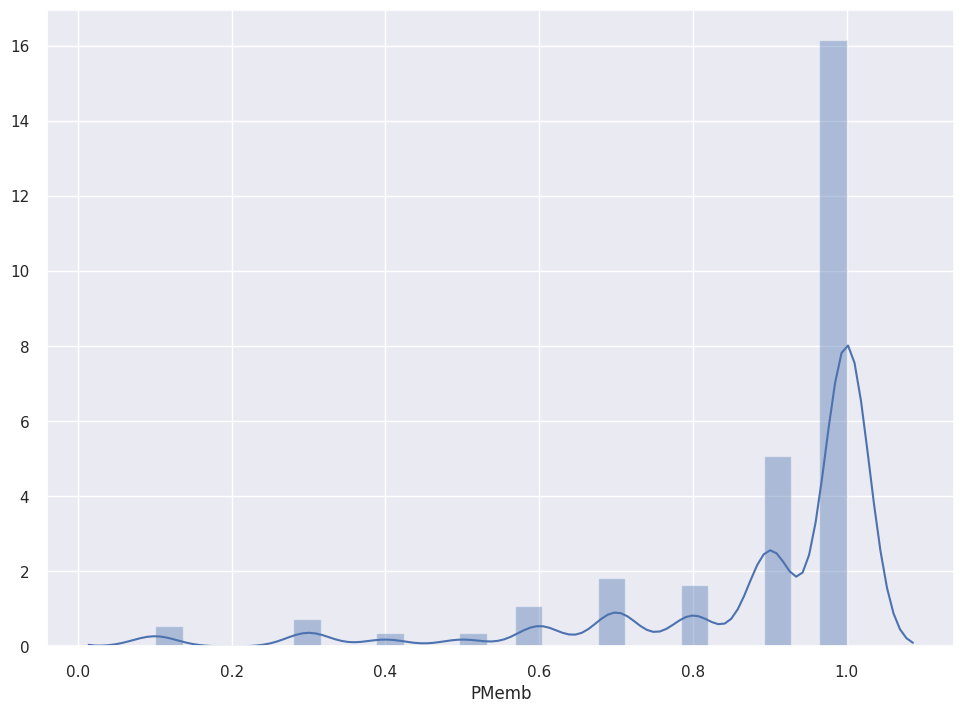

In [0]:
sns.distplot(member['PMemb'])

In [0]:
# Probable members (PMemb >= 0.5) in this dataset
len(member[member['PMemb'] >= 1])

93

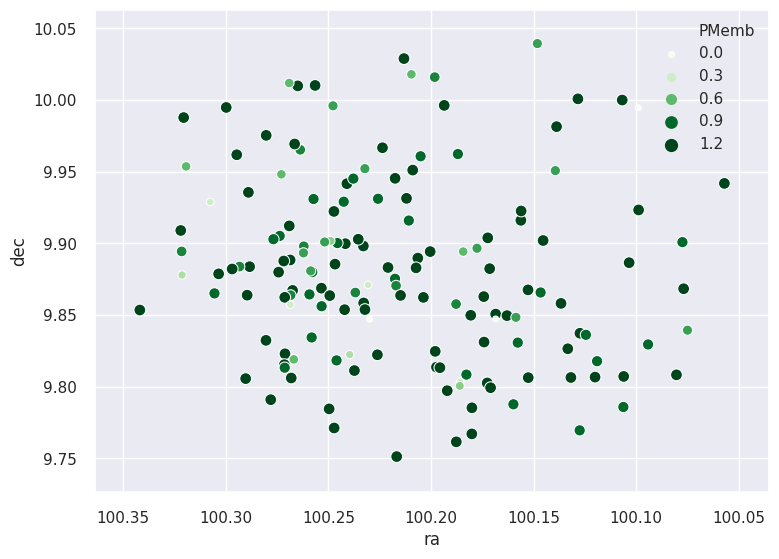

In [0]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(member['ra'], member['dec'], hue=member['PMemb'], palette='Greens', size = member['PMemb'])
skyplot.invert_xaxis()

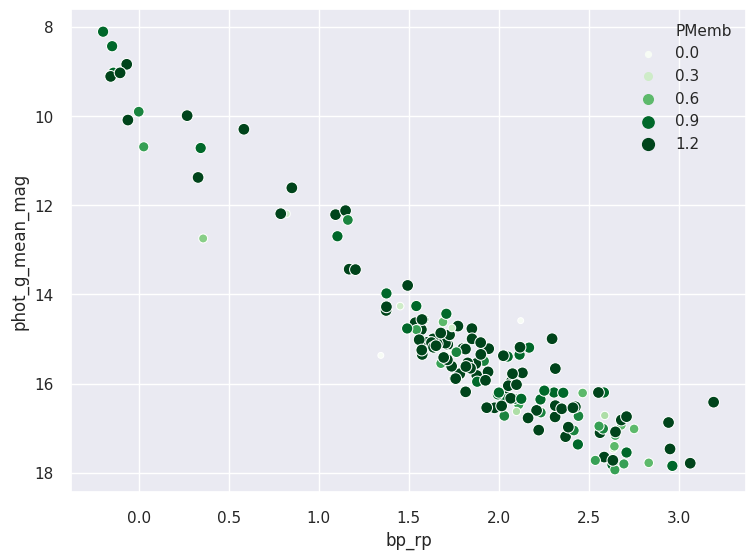

In [0]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)

cmd = sns.scatterplot(member['bp_rp'], member['phot_g_mean_mag'], hue=member['PMemb'], palette='Greens', size = member['PMemb'])
cmd.invert_yaxis()

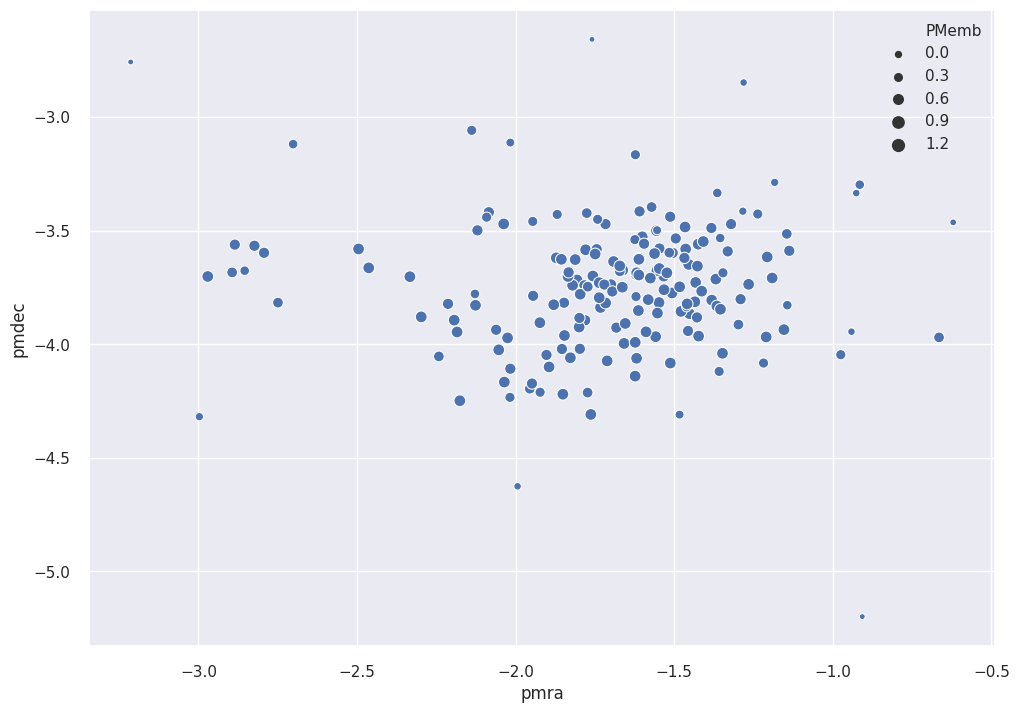

In [0]:
# proper motion plot marked with the membership probabilities of the stars 

sns.set(rc={'figure.figsize':(11.7,8.27)})
pm_plot = sns.scatterplot(member['pmra'], member['pmdec'], size = member['PMemb'])

In [0]:
# data type of each variable
member.dtypes

dist            float64
solution_id     float64
designation      object
source_id       float64
random_index      int64
                 ...   
b               float64
ecl_lon         float64
ecl_lat         float64
PMemb           float64
Cluster          object
Length: 70, dtype: object

In [0]:
# changing the data type to 32-bit-float number as the built-in radom forest package 
# don't take 64-bit-float
from numpy import float32
features1 = features1.astype('float32')
targets = targets.astype('float32')
features1.dtypes

ra                 float32
dec                float32
parallax           float32
parallax_error     float32
pmra               float32
pmra_error         float32
pmdec              float32
pmdec_error        float32
phot_g_mean_mag    float32
bp_rp              float32
dtype: object

In [0]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features1, targets)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features1.columns).sort_values(ascending = False)
feature_imp

pmdec              0.525004
pmra               0.141540
parallax           0.070720
parallax_error     0.054744
pmdec_error        0.051652
pmra_error         0.046994
dec                0.034260
ra                 0.031479
phot_g_mean_mag    0.025999
bp_rp              0.017608
dtype: float64

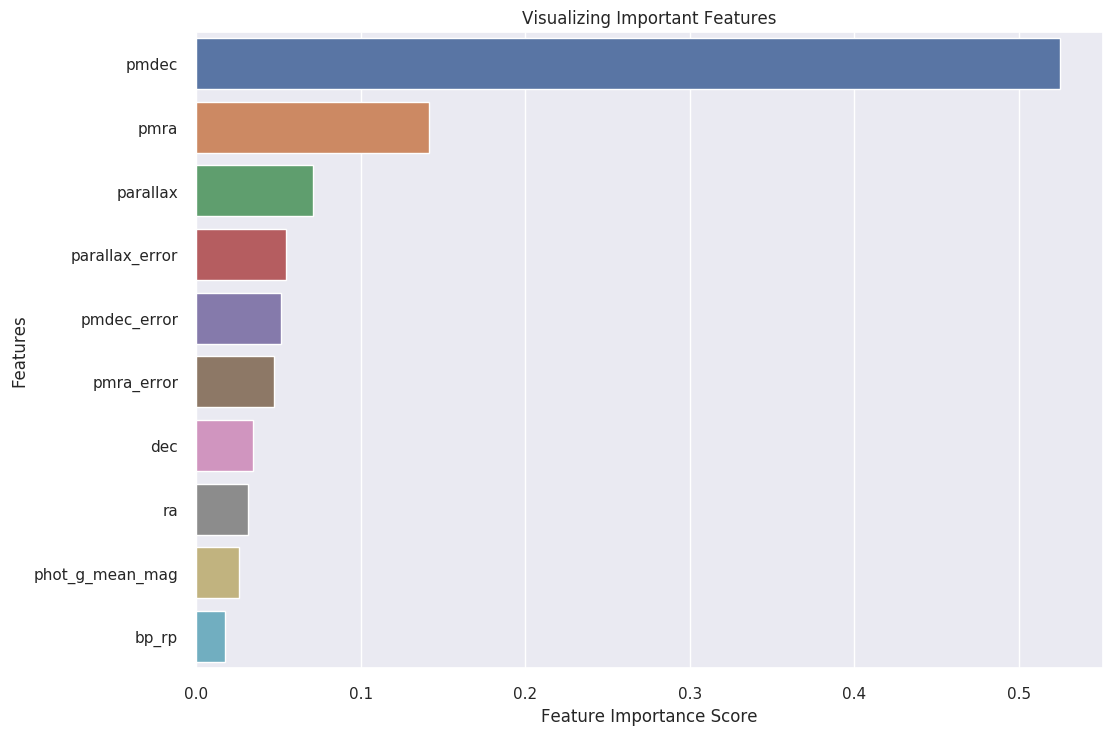

In [0]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Prediction of PMemb for the new stars

In [0]:
# Import all the stars from GAIA data around 30 m radius of cluster center
all_stars = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/ngc_2264_gaia_30m.csv', low_memory=False)
all_stars

dist     source_id          ra  ...         b     ecl_lon    ecl_lat
0     0.002256  3.326740e+18  100.243956  ...  2.197765  100.365773 -13.176377
1     0.002808  3.326740e+18  100.244416  ...  2.198482  100.366186 -13.175658
2     0.004487  3.326740e+18  100.244941  ...  2.200029  100.366538 -13.173247
3     0.004757  3.326740e+18  100.241715  ...  2.197949  100.363161 -13.171844
4     0.005845  3.326740e+18  100.235900  ...  2.191307  100.357544 -13.175635
...        ...           ...         ...  ...       ...         ...        ...
8630  0.364431  3.326900e+18   99.874169  ...  1.854705   99.995566 -13.243879
8631  0.364443  3.326950e+18  100.315963  ...  2.423748  100.411650 -12.815186
8632  0.364444  3.326940e+18  100.486830  ...  2.535108  100.590010 -12.886579
8633  0.364458  3.326960e+18  100.174569  ...  2.300579  100.269229 -12.823890
8634  0.364495  3.326950e+18   99.979814  ...  2.084024  100.080490 -12.938121

[8635 rows x 65 columns]

In [0]:
# descriptive stats
all_stars = all_stars.dropna()
all_stars.astype('float32')
all_stars.describe()

dist     source_id  ...      ecl_lon      ecl_lat
count  6845.000000  6.845000e+03  ...  6845.000000  6845.000000
mean      0.253018  3.326823e+18  ...   100.360895   -13.152796
std       0.081355  1.022324e+14  ...     0.212482     0.165131
min       0.002808  3.326690e+18  ...    99.990374   -13.540150
25%       0.201697  3.326720e+18  ...   100.180995   -13.279852
50%       0.267522  3.326750e+18  ...   100.330751   -13.146579
75%       0.319813  3.326930e+18  ...   100.565149   -13.022440
max       0.364495  3.326960e+18  ...   100.736675   -12.818307

[8 rows x 65 columns]

In [0]:
new_features2 = all_stars.iloc[:, 2:]
new_features2 = new_features2.drop(columns = ['PMemb', 'astrometric_params_solved', 'frame_rotator_object_type', 'phot_proc_mode'])
new_features2

ra  ra_error        dec  ...         b     ecl_lon    ecl_lat
1     100.244416  0.523372   9.895739  ...  2.198482  100.366186 -13.175658
3     100.241715  0.049001   9.899756  ...  2.197949  100.363161 -13.171844
4     100.235900  0.266471   9.896373  ...  2.191307  100.357544 -13.175635
5     100.245557  0.038982   9.900196  ...  2.201518  100.367005 -13.171131
8     100.232938  0.043918   9.898147  ...  2.189521  100.354423 -13.174077
...          ...       ...        ...  ...       ...         ...        ...
8628  100.246807  0.363467   9.530623  ...  2.033865  100.395891 -13.539636
8629  100.240253  0.149962   9.530579  ...  2.028095  100.389264 -13.540150
8630   99.874169  0.181164   9.853442  ...  1.854705   99.995566 -13.243879
8633  100.174569  0.218116  10.253421  ...  2.300579  100.269229 -12.823890
8634   99.979814  0.033640  10.152618  ...  2.084024  100.080490 -12.938121

[6845 rows x 60 columns]

In [0]:
set(new_features2) - set(features2)

set()

In [0]:
# select the set of predictor variables from the new dataset
new_features3 = all_stars.loc[:,['ra', 'dec', 'parallax', 'parallax_error',
                         'pmra', 'pmra_error', 'pmdec', 'pmdec_error']]
new_features3 = new_features3.astype('float32')
new_features3 = new_features3.dropna()

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:,['ra', 'dec', 'parallax', 'parallax_error',
                         'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                         'phot_g_mean_mag', 'bp_rp']]
new_features = new_features.astype('float32')
new_features = new_features.dropna()

In [0]:
# checking the data types
new_features.dtypes

ra                 float32
dec                float32
parallax           float32
parallax_error     float32
pmra               float32
pmra_error         float32
pmdec              float32
pmdec_error        float32
phot_g_mean_mag    float32
bp_rp              float32
dtype: object

In [0]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features1, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# extimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

potential_member = all_stars[all_stars['PMemb'] > 0.85]
len(potential_member)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


315

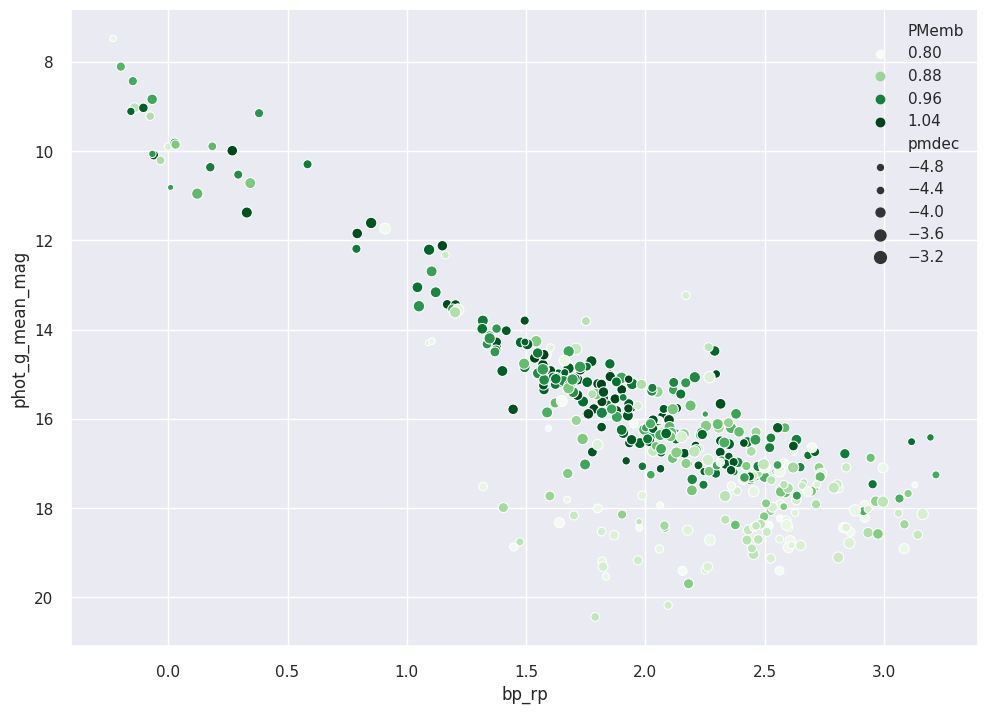

In [0]:
# CMD using all the stars where the membership Probability are expressed as colors

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(potential_member['bp_rp'], potential_member['phot_g_mean_mag'], hue=potential_member['PMemb'], 
                      palette='Greens', size = potential_member['pmdec'] )
cmd.invert_yaxis()

In [0]:
potential_member.describe()

dist     source_id          ra  ...     ecl_lon     ecl_lat       PMemb
count  407.000000  4.070000e+02  407.000000  ...  407.000000  407.000000  407.000000
mean     0.189781  3.326761e+18  100.230217  ...  100.359354  -13.276676    0.913685
std      0.107176  8.631043e+13    0.117928  ...    0.121022    0.153798    0.063339
min      0.004757  3.326690e+18   99.891589  ...  100.015391  -13.536248    0.801000
25%      0.090930  3.326710e+18  100.157369  ...  100.286457  -13.404587    0.856000
50%      0.187940  3.326720e+18  100.230473  ...  100.356941  -13.270394    0.921000
75%      0.290179  3.326740e+18  100.289942  ...  100.419393  -13.183731    0.974000
max      0.363724  3.326960e+18  100.547414  ...  100.684685  -12.818307    1.000000

[8 rows x 66 columns]

In [0]:
member.describe()

dist   solution_id  ...       PMemb    Separation
count  153.000000  1.530000e+02  ...  153.000000  1.530000e+02
mean     0.082276  1.635721e+18  ...    0.884314  1.475398e-08
std      0.044979  0.000000e+00  ...    0.199710  4.966399e-09
min      0.004757  1.635721e+18  ...    0.100000  1.086479e-09
25%      0.041253  1.635721e+18  ...    0.900000  1.190519e-08
50%      0.078604  1.635721e+18  ...    1.000000  1.544945e-08
75%      0.114987  1.635721e+18  ...    1.000000  1.826017e-08
max      0.187742  1.635721e+18  ...    1.000000  2.397258e-08

[8 rows x 110 columns]

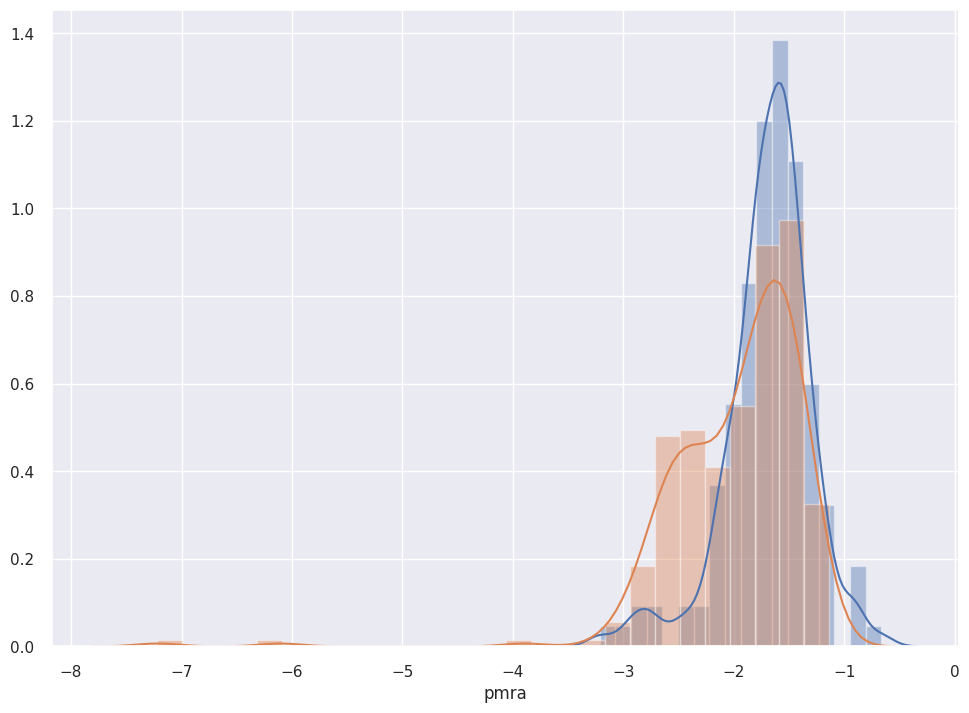

In [0]:
sns.distplot(member['pmra'])
sns.distplot(potential_member['pmra'])

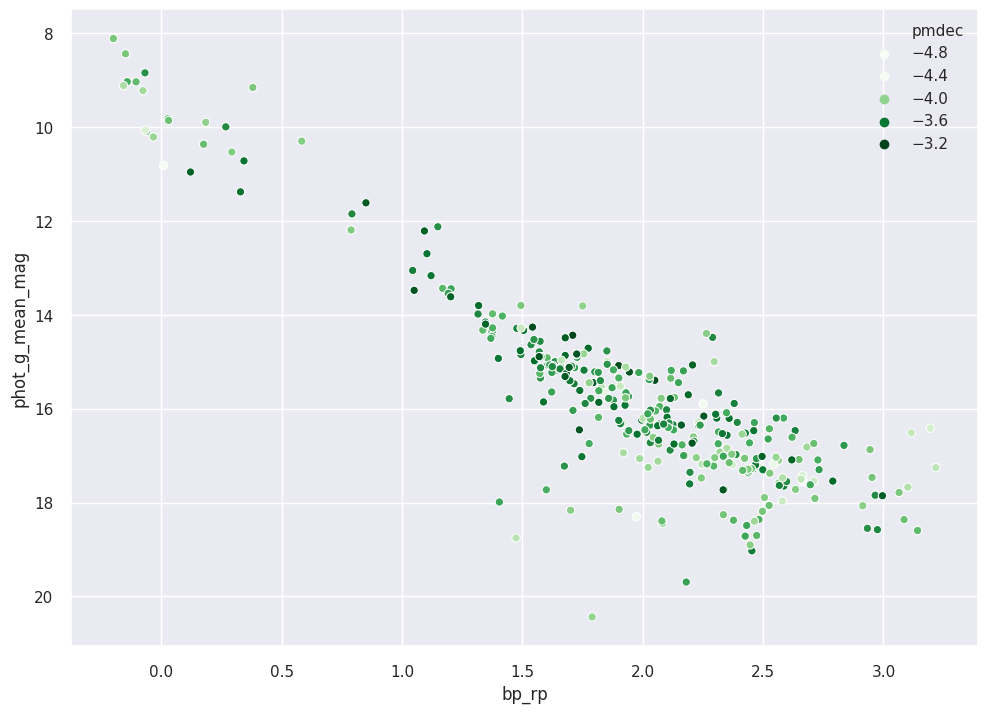

In [0]:
subset = potential_member[potential_member['pmra'] <= -3]

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', data = potential_member, color = 'red', hue = 'pmdec', palette = 'Greens')
# sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', data = subset, color = 'blue')
cmd.invert_yaxis()

In [0]:
potential_member.to_csv('potential.csv')

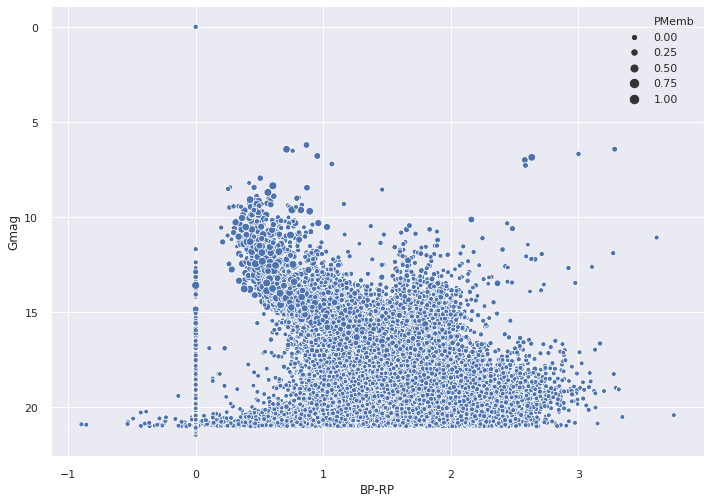

In [0]:
# CMD using all the stars where the membership Probability are expressed as the size of the dots

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(all_stars['BP-RP'], all_stars['Gmag'], size = all_stars['PMemb'])
cmd.invert_yaxis()

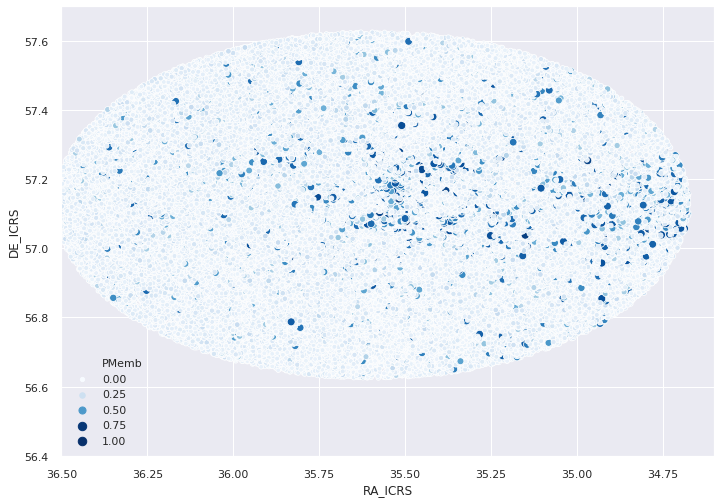

In [0]:
skyplot = sns.scatterplot(all_stars['RA_ICRS'], all_stars['DE_ICRS'], hue=all_stars['PMemb'], palette='Blues', size = all_stars['PMemb'])
plt.ylim(56.4,57.7)
plt.xlim(34.6,36.5)
skyplot.invert_xaxis()

In [0]:
# define the subset of the probable members
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

1219

In [0]:
# comparing the descriptive stats of the all stars vs the probable members
all_stars.describe()

RA_ICRS     e_RA_ICRS  ...           Lum         PMemb
count  53040.000000  53040.000000  ...  53040.000000  53040.000000
mean      35.577007      0.684874  ...      4.553935      0.189164
std        0.487397      1.677180  ...    194.760483      0.077563
min        0.000000      0.000000  ...      0.000000      0.108000
25%       35.211562      0.096000  ...      0.000000      0.154000
50%       35.570442      0.254400  ...      0.000000      0.172000
75%       35.946352      0.568900  ...      0.000000      0.190000
max       36.516582     68.333000  ...  21300.007812      0.769000

[8 rows x 34 columns]

In [0]:
potentialMember.describe()

RA_ICRS    e_RA_ICRS  ...           Lum        PMemb
count  1219.000000  1219.000000  ...   1219.000000  1219.000000
mean     35.349251     0.023502  ...     57.357056     0.602311
std       0.424367     0.006286  ...    595.159546     0.058846
min      34.676834     0.012500  ...      0.000000     0.500000
25%      34.953375     0.018300  ...      2.514000     0.553000
50%      35.379745     0.022800  ...      5.670000     0.603000
75%      35.608358     0.027800  ...     15.275500     0.648000
max      36.483715     0.047400  ...  16623.664062     0.769000

[8 rows x 34 columns]

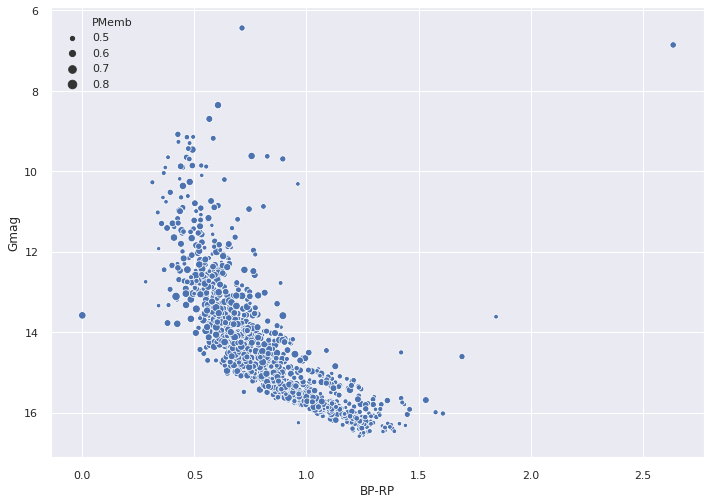

In [0]:
# CMD of only probable members 

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()



### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features3, targets, 0.3)


In [0]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.6030723576636963

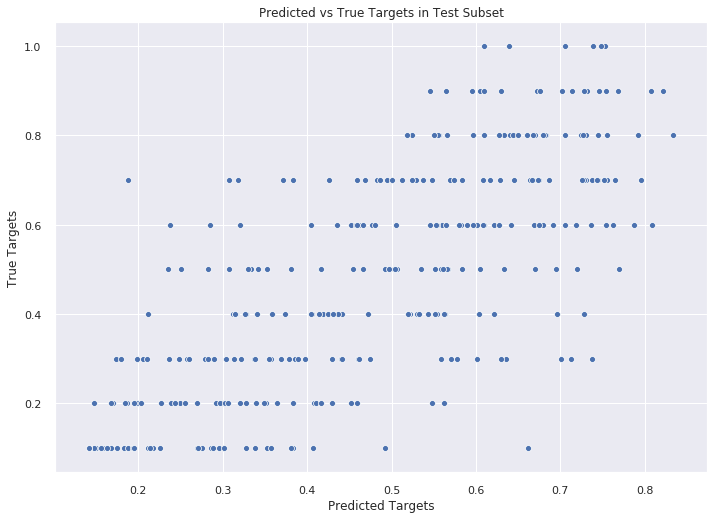

In [0]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [0]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [0]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features2, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

NameError: ignored

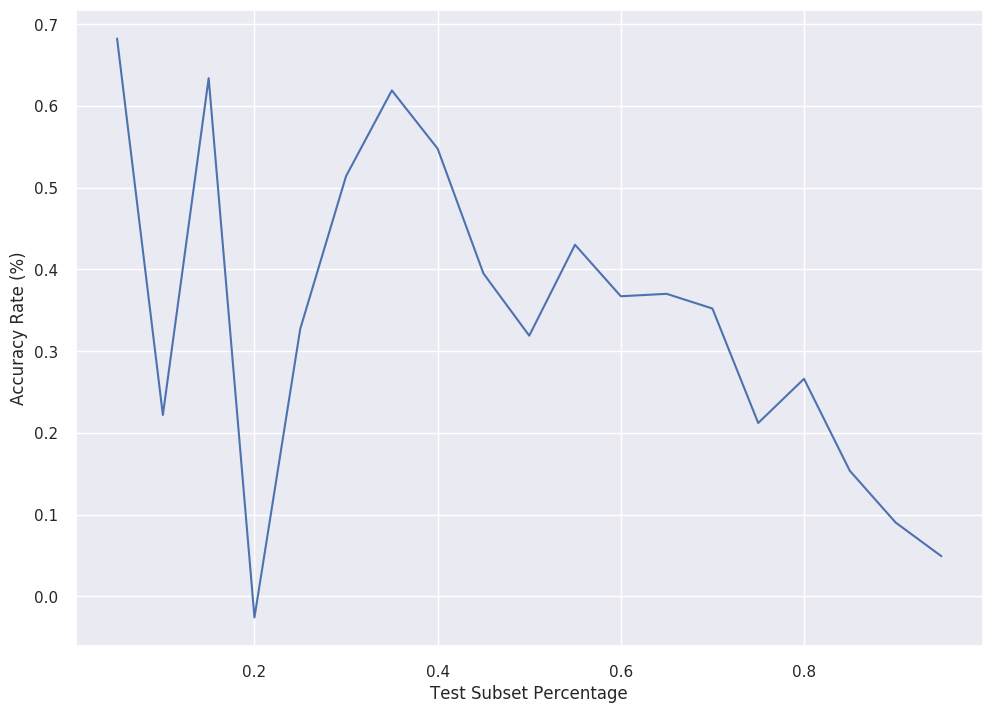

In [0]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [0]:
concatenated

AG     BP-RP    BPmag  Cluster  ...  o_Gmag     plx   pmDE   pmRA
566   1.3647  0.565000  12.3574      NaN  ...     NaN  0.3468 -1.166 -0.696
597   0.0000  0.772000  14.7508      NaN  ...     NaN  0.3884 -1.185 -0.742
710   0.0000  0.817300  15.4145      NaN  ...     NaN  0.4162 -1.076 -0.664
714   0.0000  0.701900  14.0165      NaN  ...     NaN  0.4057 -1.040 -0.431
954   0.0000  0.777700  15.4499      NaN  ...     NaN  0.3894 -0.884 -0.693
...      ...       ...      ...      ...  ...     ...     ...    ...    ...
1097     NaN  0.948518      NaN  NGC_884  ...   251.0  0.3990 -1.061 -0.689
1098     NaN  0.902059      NaN  NGC_884  ...   273.0  0.3691 -0.999 -0.640
1099     NaN  1.026316      NaN  NGC_884  ...   268.0  0.4372 -0.948 -0.515
1103     NaN  0.795093      NaN  NGC_884  ...   255.0  0.4018 -0.933 -0.490
1106     NaN  0.576590      NaN  NGC_884  ...   252.0  0.4296 -0.921 -0.564

[1837 rows x 41 columns]

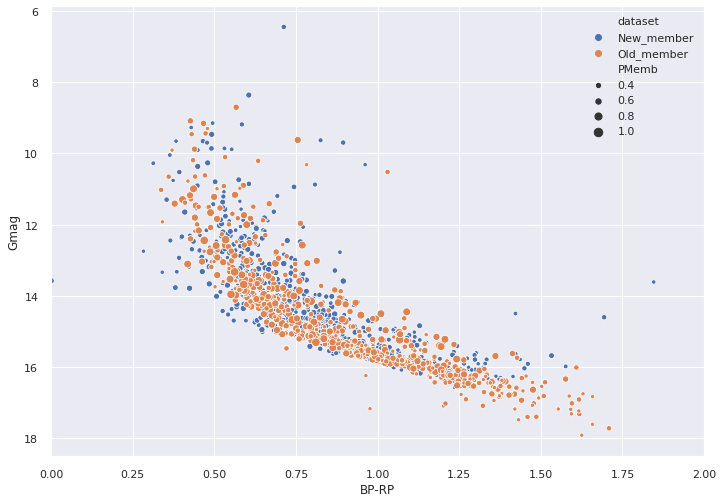

In [0]:
cmd = sns.scatterplot(x='BP-RP', y='Gmag', data=concatenated,
                size='PMemb', hue='dataset')
plt.xlim(0,2)
cmd.invert_yaxis()

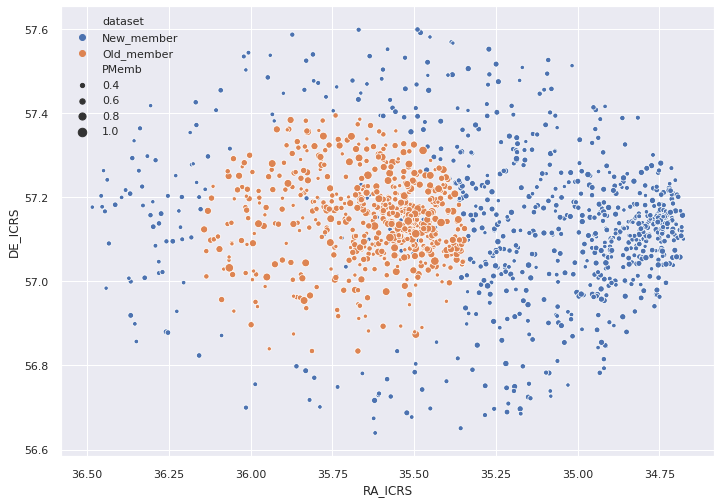

In [0]:
skyplot = sns.scatterplot(x='RA_ICRS', y='DE_ICRS', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

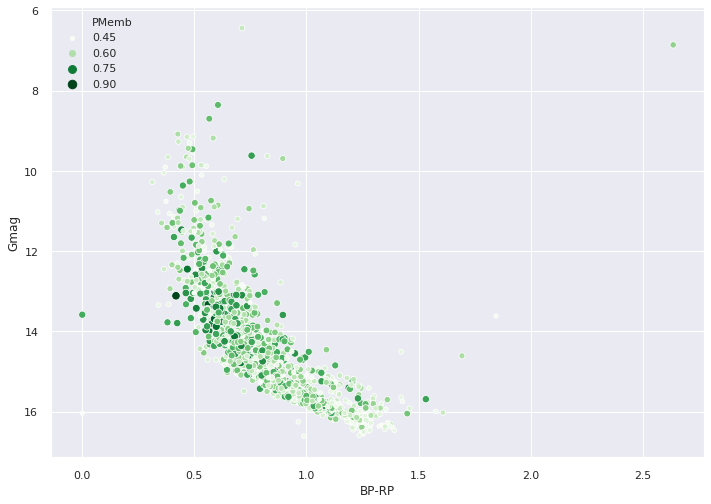

In [0]:
# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], hue=potentialMember['PMemb'], palette='Greens', size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [0]:
all_stars.to_csv('n884_membership_prob.csv')

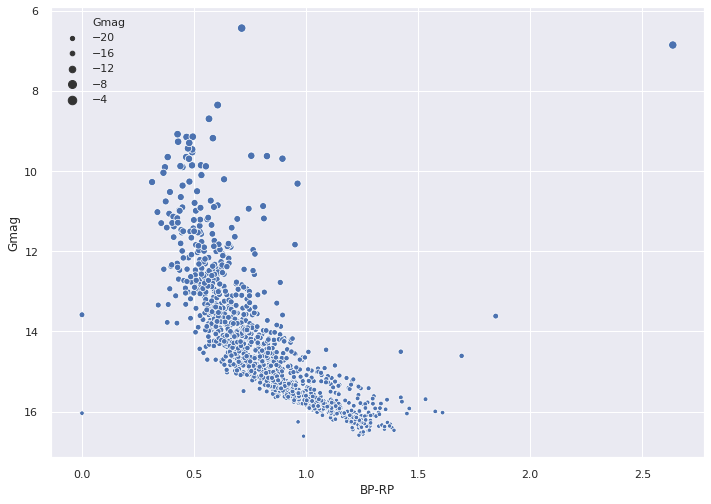

In [0]:
# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = -1*potentialMember['Gmag'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [0]:
a = np.array([2,2,3,3,3,5,6,4])
list(set(a))

[2, 3, 4, 5, 6]

In [0]:
pd_prof.ProfileReport(all_stars)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


(array([2.8767e+04, 2.0455e+04, 1.4880e+03, 5.5400e+02, 3.5000e+02,
        3.3000e+02, 3.7900e+02, 4.3100e+02, 2.6200e+02, 2.4000e+01]),
 array([0.111     , 0.1805    , 0.25      , 0.3195    , 0.389     ,
        0.45849999, 0.52799999, 0.59749999, 0.66699999, 0.73649999,
        0.80599999]),
 <a list of 10 Patch objects>)

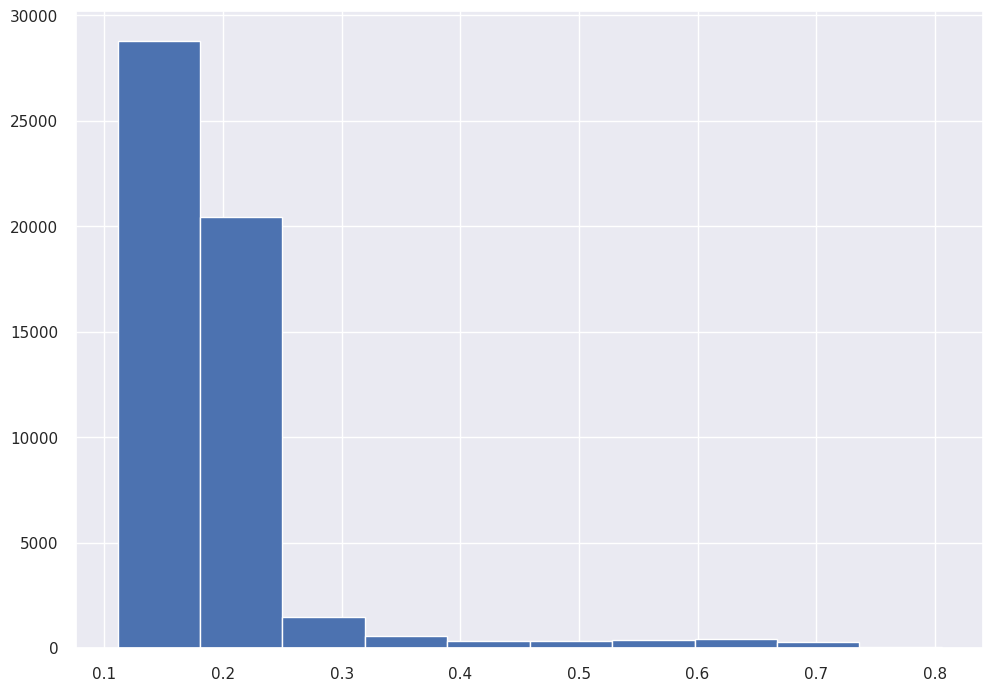

In [0]:
plt.hist(all_stars['PMemb'])